# Stock Price Prediction of Microsoft

Importing necessary Libraries

In [163]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.dates as mdates
from sklearn import linear_model

# Reading data using parse date
As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [164]:
df_final = pd.read_csv("^NSEI (1).csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

<ipython-input-164-4d45138e163f>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_final = pd.read_csv("^NSEI (1).csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)


# Performing EDA Analysis

In [165]:
df_final.shape


(4158, 6)

In [166]:
df_final.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [167]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4.128000e+03
mean,9730.751344,9783.929943,9661.954256,9724.639271,9724.639271,2.027505e+05
std,5086.223301,5098.724455,5064.861158,5083.553153,5083.553153,2.101396e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5555.312378,5592.887451,5506.150146,5550.650024,5550.650024,0.000000e+00
50%,8356.375000,8399.375000,8307.175293,8346.799805,8346.799805,1.745000e+05
75%,11836.525391,11883.174805,11723.074951,11801.212891,11801.212891,2.832250e+05
max,24853.800781,24854.800781,24587.650391,24800.849609,24800.849609,1.811000e+06


In [168]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4158 entries, 2007-09-17 to 2024-07-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4128 non-null   float64
 1   High       4128 non-null   float64
 2   Low        4128 non-null   float64
 3   Close      4128 non-null   float64
 4   Adj Close  4128 non-null   float64
 5   Volume     4128 non-null   float64
dtypes: float64(6)
memory usage: 227.4 KB


In [169]:
df_final.isnull().sum()

Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

In [170]:
df_final.interpolate(method='linear', inplace=True)


In [171]:
df_final.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

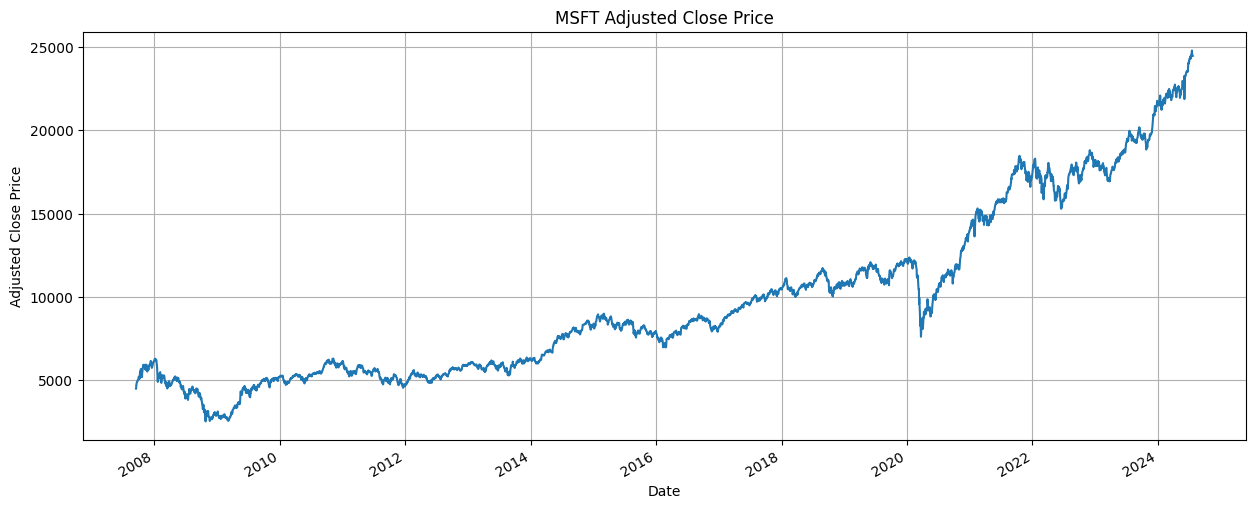

In [176]:
df_final['Adj Close'].plot(figsize=(15, 6))
plt.title('MSFT Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()

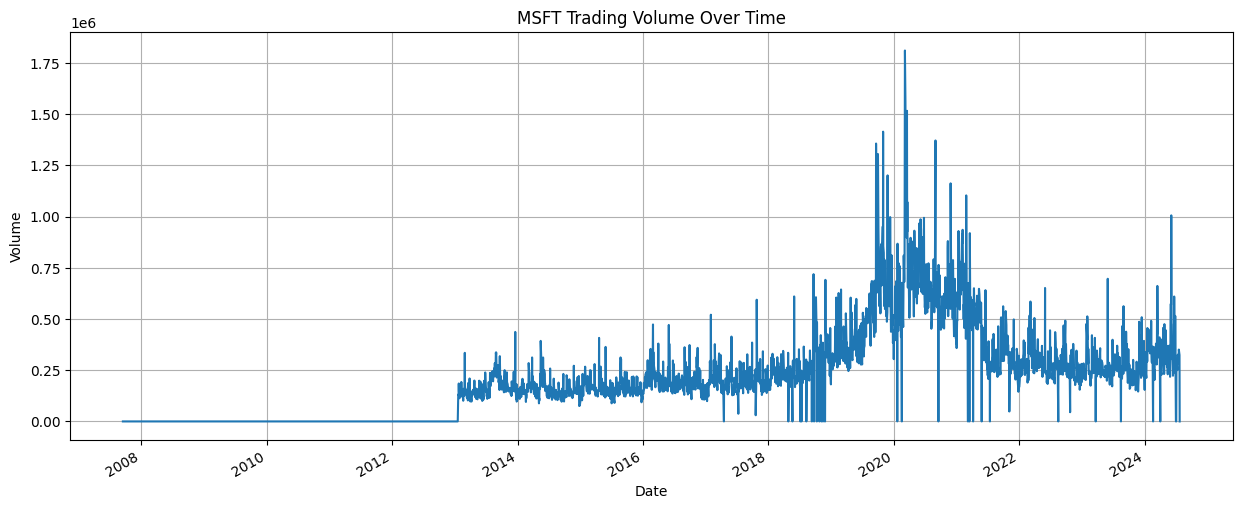

In [177]:
plt.figure(figsize=(15, 6))
df_final['Volume'].plot()
plt.title('MSFT Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

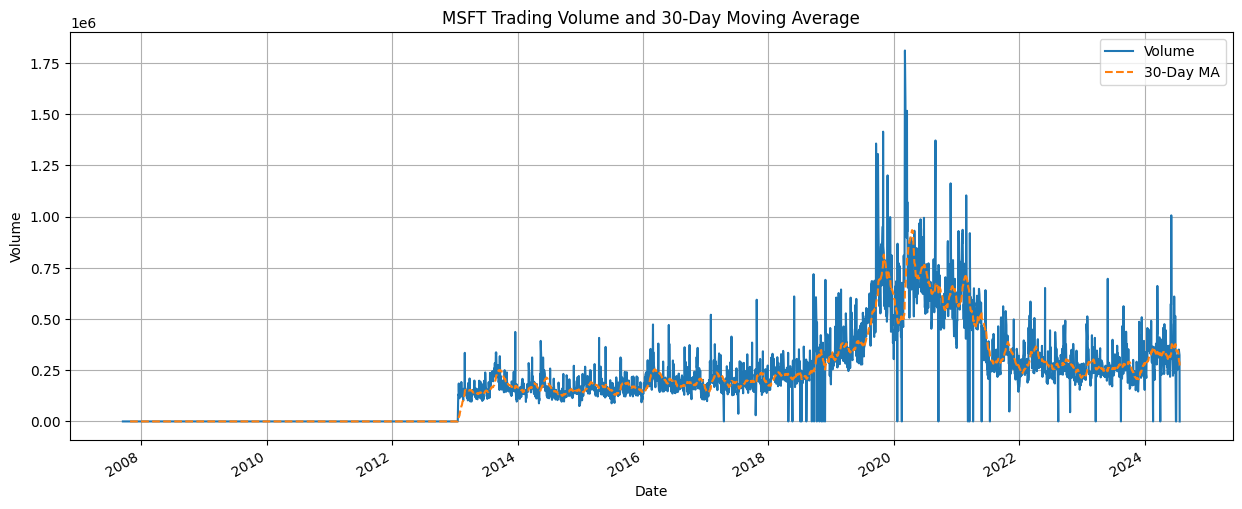

In [178]:
df_final['Volume_MA30'] = df_final['Volume'].rolling(window=30).mean()
plt.figure(figsize=(15, 6))
df_final['Volume'].plot(label='Volume')
df_final['Volume_MA30'].plot(label='30-Day MA', linestyle='--')
plt.title('MSFT Trading Volume and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [179]:
df_final['MA20'] = df_final['Adj Close'].rolling(window=20).mean()
df_final['MA50'] = df_final['Adj Close'].rolling(window=50).mean()
df_final['MA100'] = df_final['Adj Close'].rolling(window=100).mean()

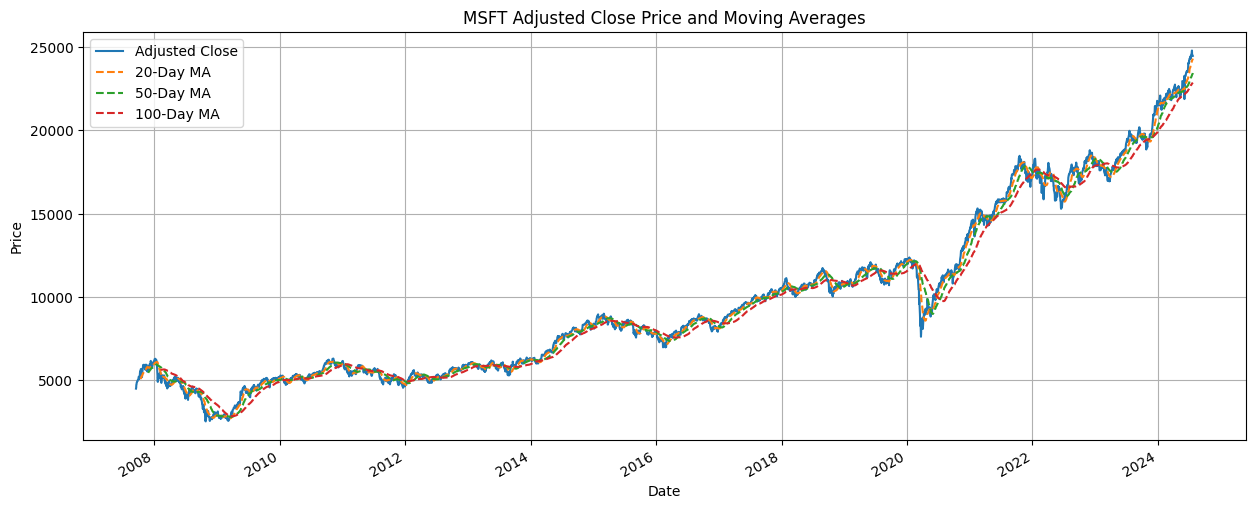

In [180]:
plt.figure(figsize=(15, 6))
df_final['Adj Close'].plot(label='Adjusted Close')
df_final['MA20'].plot(label='20-Day MA', linestyle='--')
df_final['MA50'].plot(label='50-Day MA', linestyle='--')
df_final['MA100'].plot(label='100-Day MA', linestyle='--')
plt.title('MSFT Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Enhanced EDA

In [181]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final['Adj Close'], model='multiplicative', period=30)

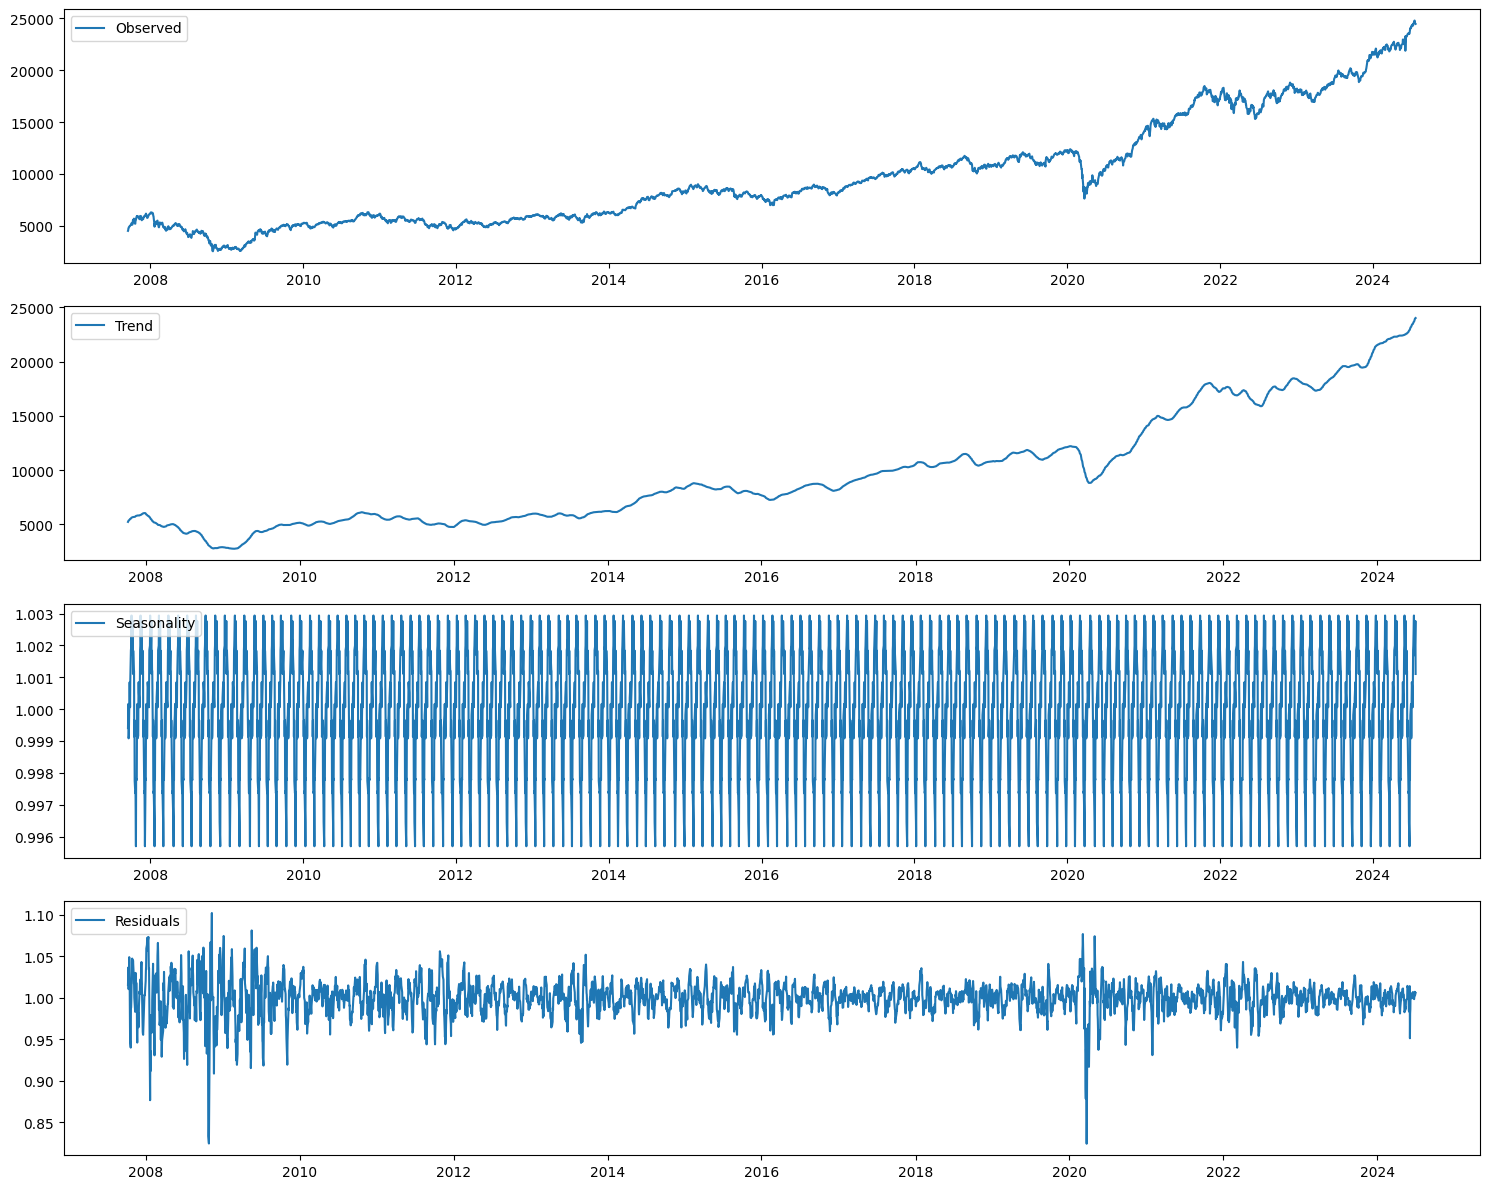

In [182]:
plt.figure(figsize=(15, 12))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

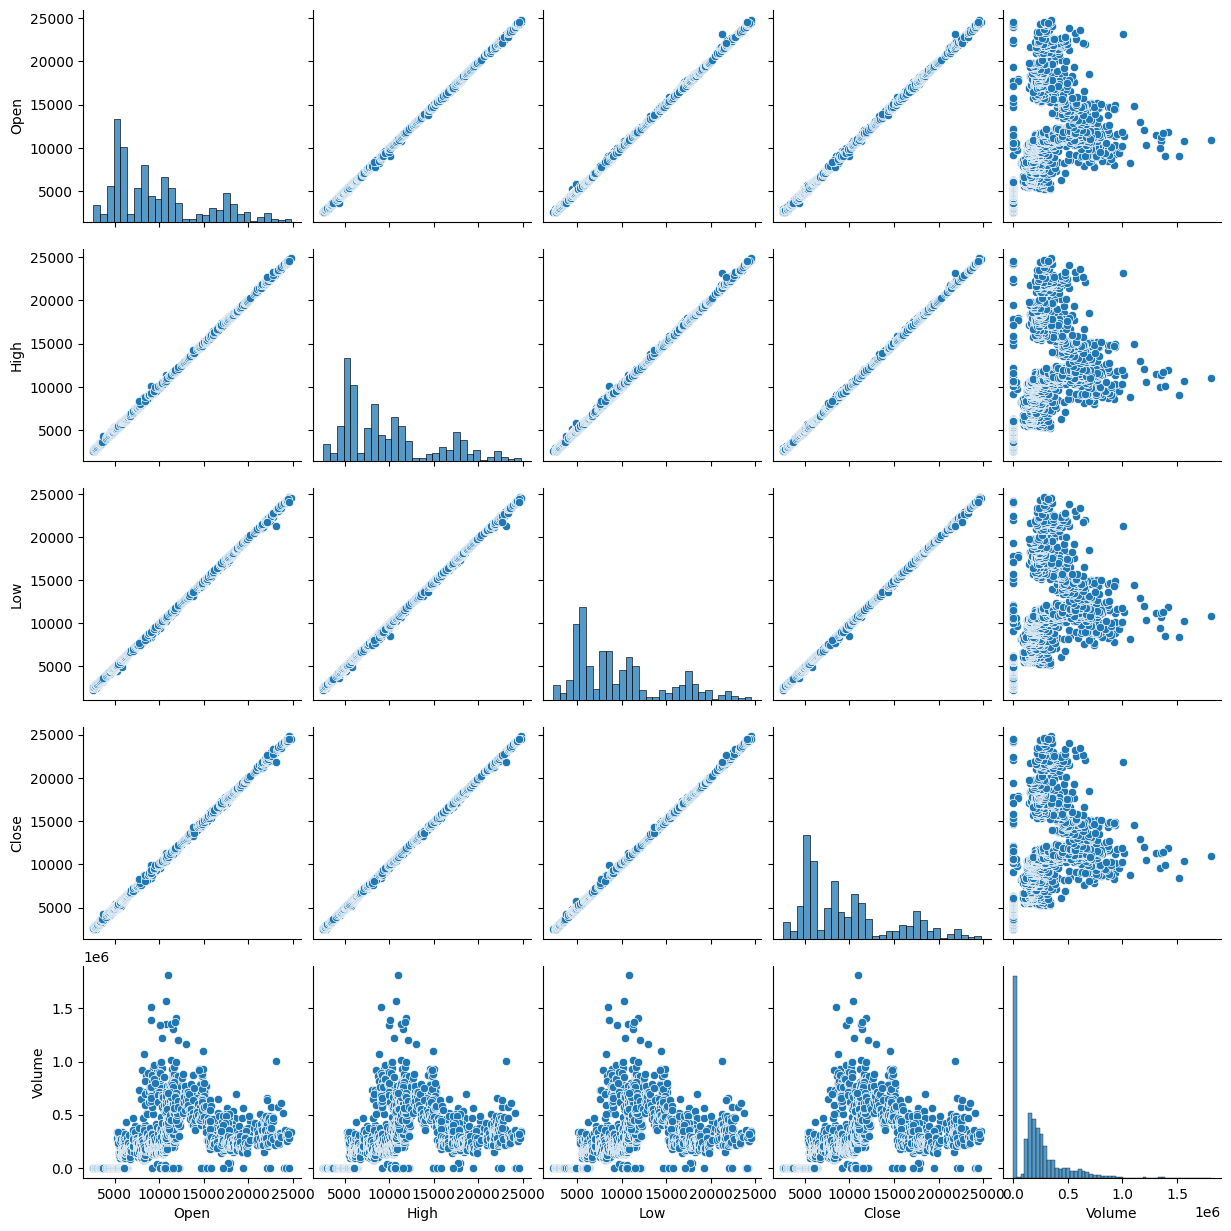

In [183]:
import seaborn as sns
sns.pairplot(df_final[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

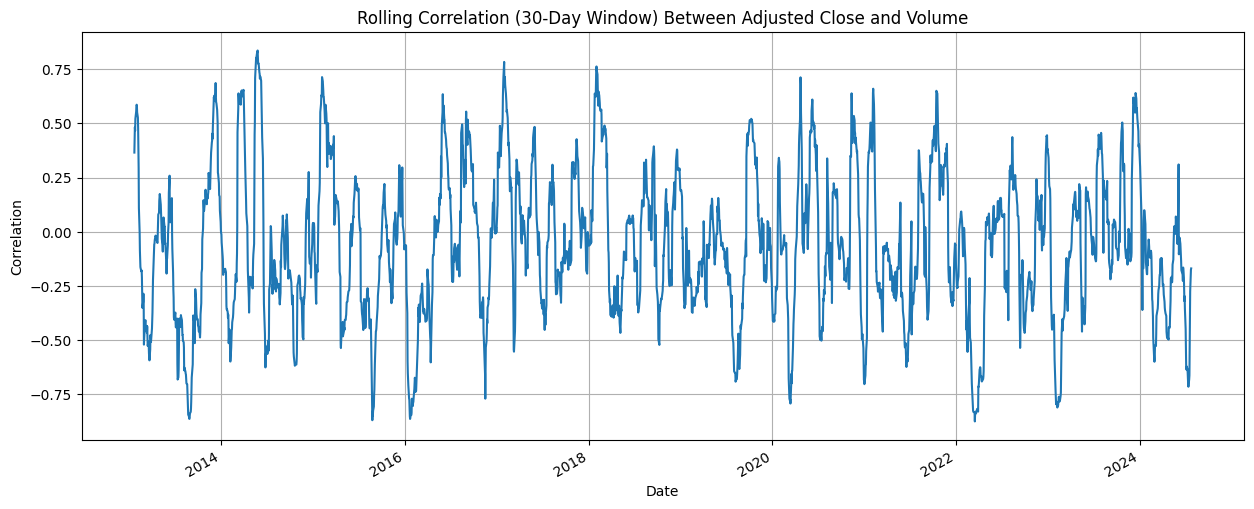

In [184]:
rolling_corr = df_final['Adj Close'].rolling(window=30).corr(df_final['Volume'])
plt.figure(figsize=(15, 6))
rolling_corr.plot()
plt.title('Rolling Correlation (30-Day Window) Between Adjusted Close and Volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

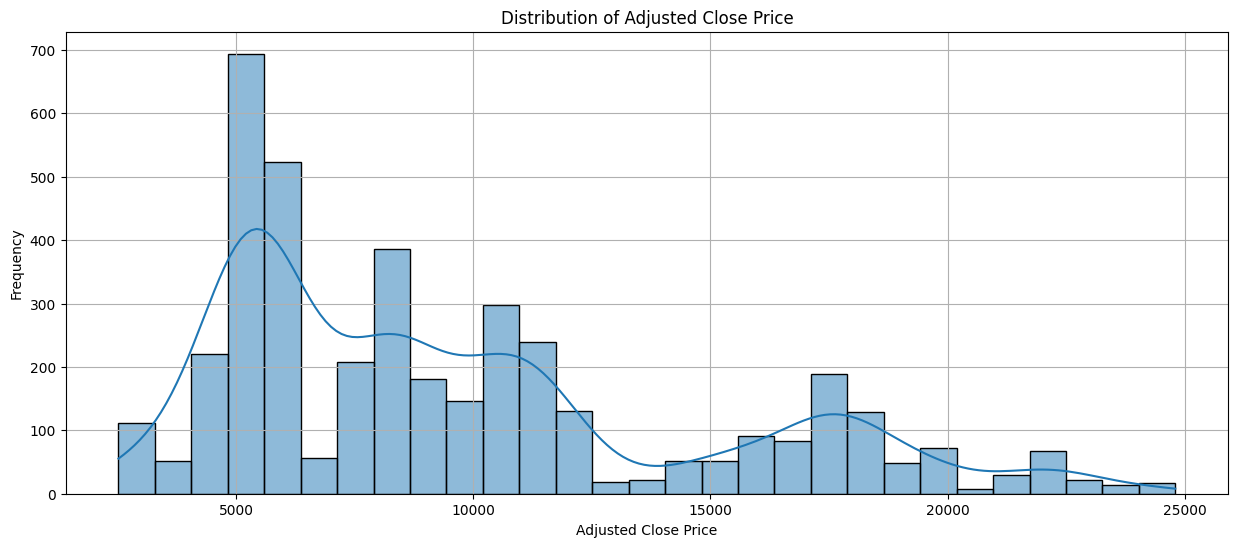

In [185]:
plt.figure(figsize=(15, 6))
sns.histplot(df_final['Adj Close'], kde=True)
plt.title('Distribution of Adjusted Close Price')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

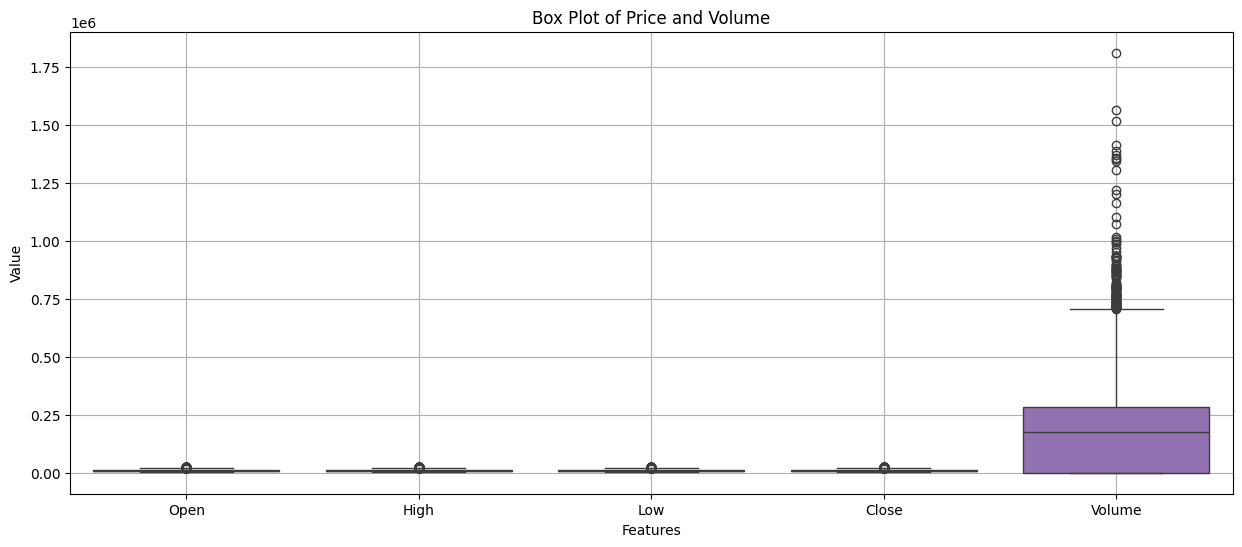

In [186]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_final[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Box Plot of Price and Volume')
plt.xlabel('Features')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [187]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume,Volume_MA30,MA20,MA50,MA100
count,4158.000000,4158.000000,4158.000000,4158.000000,4158.000000,4.158000e+03,4129.000000,4139.000000,4109.000000,4059.000000
mean,9708.727838,9761.832192,9640.087319,9702.682753,9702.682753,2.021357e+05,202636.380883,9679.880286,9644.534525,9588.094057
std,5078.536820,5090.998907,5057.157596,5075.817590,5075.817590,2.101380e+05,194868.079753,5028.575658,4962.876694,4865.627694
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00,0.000000,2715.179956,2784.175981,2827.648738
25%,5548.962525,5586.199829,5497.787598,5543.812500,5543.812500,0.000000e+00,0.000000,5566.171265,5609.049009,5578.069375
50%,8340.424805,8380.175293,8286.250000,8337.450195,8337.450195,1.739000e+05,182863.333333,8321.736304,8343.917012,8412.149517
75%,11769.837891,11843.912354,11684.337158,11760.500244,11760.500244,2.826000e+05,282556.666667,11710.662500,11639.377500,11488.873145
max,24853.800781,24854.800781,24587.650391,24800.849609,24800.849609,1.811000e+06,933716.666667,24311.977441,23451.100937,22874.184453


In [188]:
df_final.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Volume_MA30    29
MA20           19
MA50           49
MA100          99
dtype: int64

In [189]:

df_final.dropna(inplace=True)
df_final.isnull().sum()


Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Volume_MA30    0
MA20           0
MA50           0
MA100          0
dtype: int64

# Correlation Analysis

In [190]:
correlation_matrix = df_final.corr()
correlation_matrix


,Open,High,Low,Close,Adj Close,Volume,Volume_MA30,MA20,MA50,MA100
Open,1.000000,0.999933,0.999894,0.999833,0.999833,0.532177,0.583957,0.998661,0.996215,0.992725
High,0.999933,1.000000,0.999871,0.999921,0.999921,0.533636,0.584853,0.998774,0.996420,0.993004
Low,0.999894,0.999871,1.000000,0.999922,0.999922,0.529505,0.582439,0.998433,0.995887,0.992362
Close,0.999833,0.999921,0.999922,1.000000,1.000000,0.531508,0.583592,0.998545,0.996093,0.992634
Adj Close,0.999833,0.999921,0.999922,1.000000,1.000000,0.531508,0.583592,0.998545,0.996093,0.992634
Volume,0.532177,0.533636,0.529505,0.531508,0.531508,1.000000,0.912495,0.534445,0.535863,0.538623
Volume_MA30,0.583957,0.584853,0.582439,0.583592,0.583592,0.912495,1.000000,0.583756,0.585449,0.587867
MA20,0.998661,0.998774,0.998433,0.998545,0.998545,0.534445,0.583756,1.000000,0.998509,0.995148
MA50,0.996215,0.996420,0.995887,0.996093,0.996093,0.535863,0.585449,0.998509,1.000000,0.998088
MA100,0.992725,0.993004,0.992362,0.992634,0.992634,0.538623,0.587867,0.995148,0.998088,1.000000


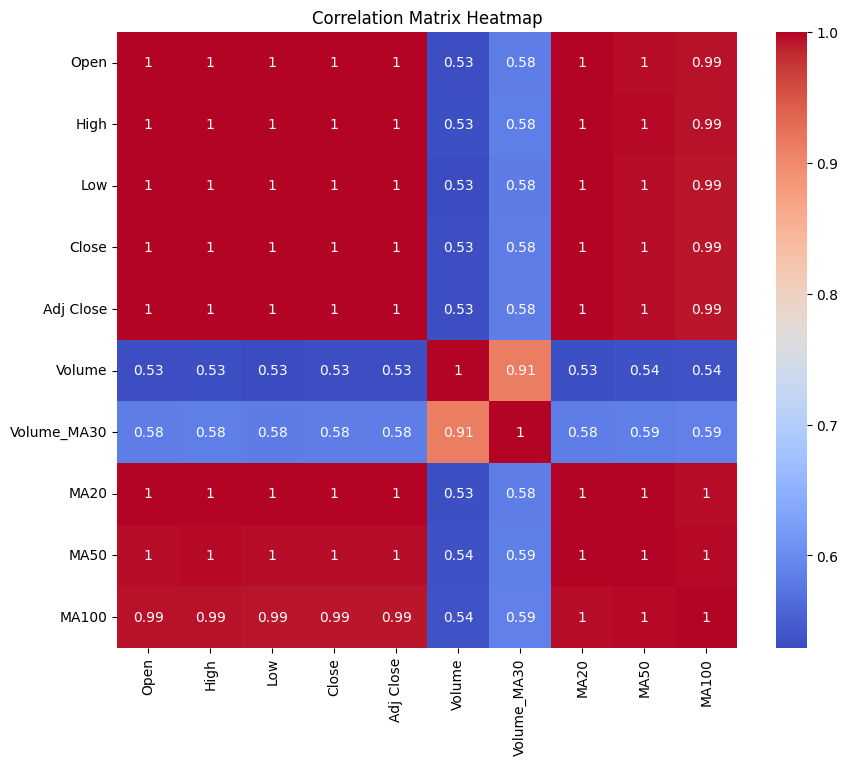

In [191]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [192]:
X = df_final.drop(['Adj Close'], axis=1)
X = X.drop(['Close'], axis=1)

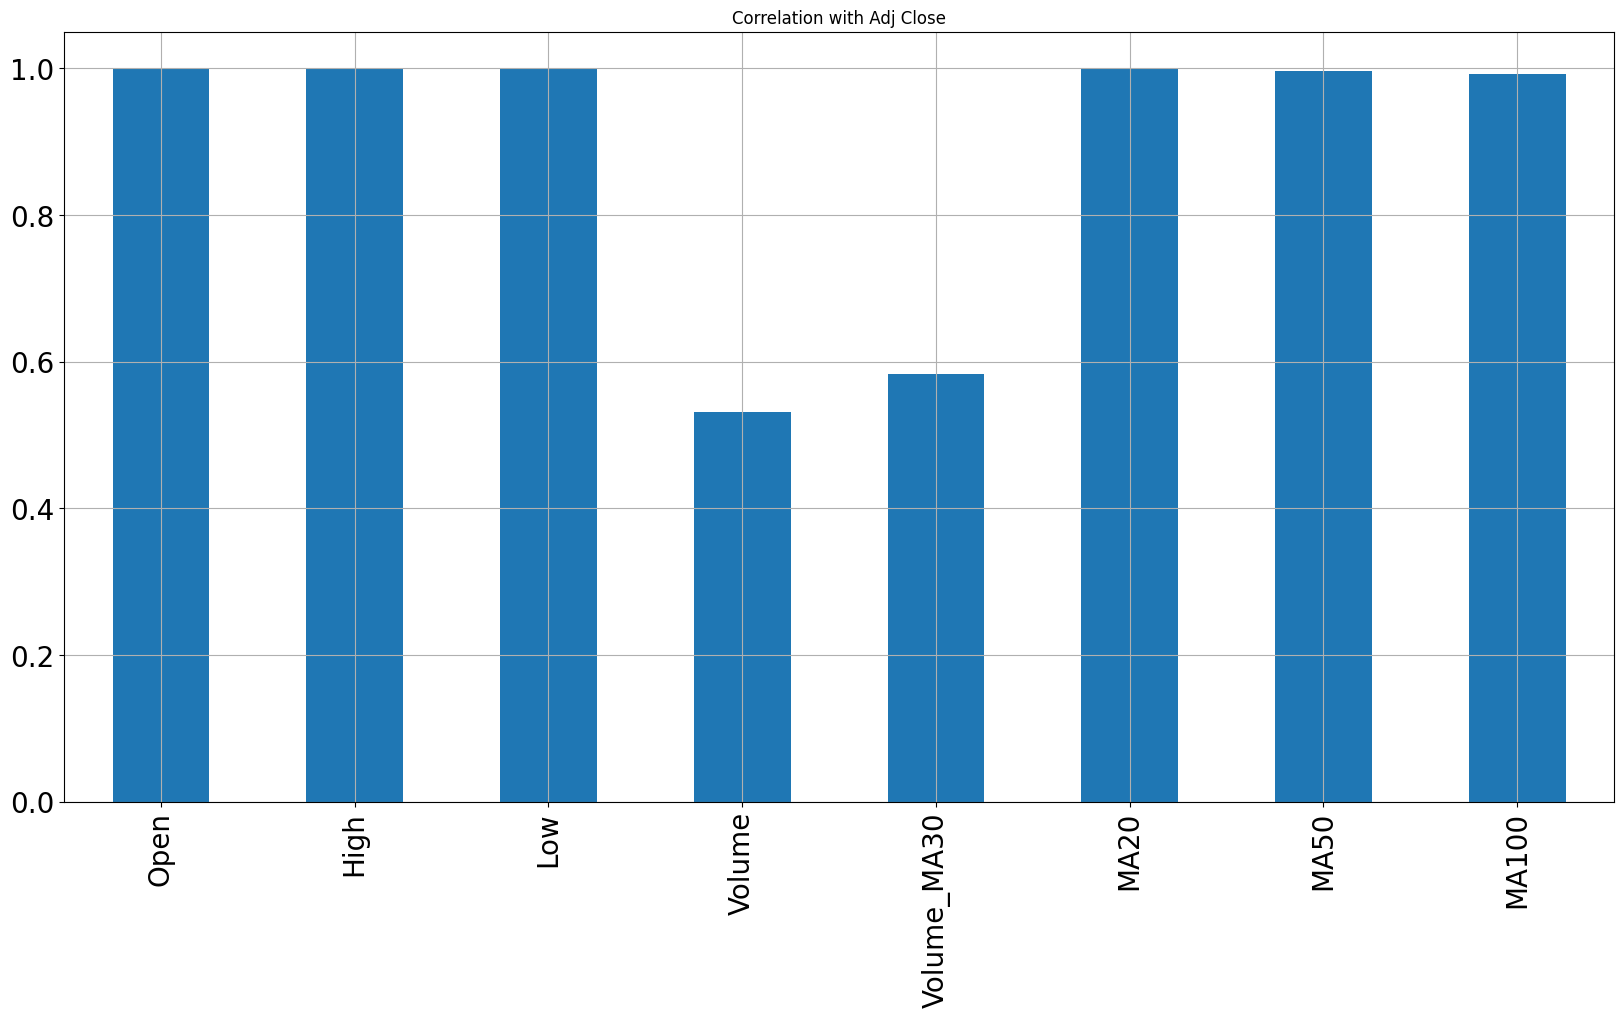

In [193]:
X.corrwith(df_final['Adj Close']).plot.bar(
    figsize=(20, 10), title="Correlation with Adj Close", fontsize=20,
    rot=90, grid=True
)
plt.show()

In [197]:
test = df_final
target_adj_close = pd.DataFrame(test['Adj Close'])

In [198]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']


# Normalizing the data

In [199]:
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)


In [200]:
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2008-02-07,0.124167,0.123905,0.128100,0.0
2008-02-08,0.115627,0.116237,0.124536,0.0
2008-02-11,0.115109,0.114107,0.114209,0.0
2008-02-12,0.104226,0.106168,0.114964,0.0
2008-02-13,0.102374,0.107827,0.115684,0.0


In [201]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

In [202]:
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]


In [203]:
validation_X.tail()

,Open,High,Low,Volume
Date,,,,
2024-07-15,0.988063,0.990132,0.997094,0.168636
2024-07-16,0.989332,0.991309,1.000000,0.156378
2024-07-18,0.986099,0.999234,0.996275,0.193760
2024-07-19,1.000000,1.000000,0.996441,0.189840
2024-07-22,0.981702,0.988343,0.989910,0.179017


#-----After process------

In [204]:
target_adj_close.tail()

,Adj Close
Date,
2024-02-29,22338.750000
2024-03-01,22405.599609
2024-03-04,22356.300781
2024-03-05,22474.050781
2024-03-06,22493.550781


In [205]:
feature_minmax_transform.shape


(3969, 4)

In [206]:
target_adj_close.shape

(3969, 1)

In [207]:
ts_split = TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
    X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [208]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [209]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print(f'{model_name} RMSE: {RSME_score}')

    R2_score = r2_score(validation_y, predicted)
    print(f'{model_name} R2 score: {R2_score}')

    plt.plot(validation_y.index, predicted, 'r', label='Predict')
    plt.plot(validation_y.index, validation_y, 'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(f'{model_name} Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Importing different Neural Nework from keras lib

In [212]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Conv1D, MaxPooling1D, Flatten
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Model building : LSTM

In [218]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=20, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
181/181 [==============================] - 6s 2ms/step - loss: 87593248.0000
Epoch 2/200
181/181 [==============================] - 0s 2ms/step - loss: 87561816.0000
Epoch 3/200
181/181 [==============================] - 0s 2ms/step - loss: 87504776.0000
Epoch 4/200
181/181 [==============================] - 0s 3ms/step - loss: 87419064.0000
Epoch 5/200
181/181 [==============================] - 0s 2ms/step - loss: 87306224.0000
Epoch 6/200
181/181 [==============================] - 0s 2ms/step - loss: 87169632.0000
Epoch 7/200
181/181 [==============================] - 0s 2ms/step - loss: 87012472.0000
Epoch 8/200
181/181 [==============================] - 0s 3ms/step - loss: 86837080.0000
Epoch 9/200
181/181 [==============================] - 0s 2ms/step - loss: 86645144.0000
Epoch 10/200
181/181 [==============================] - 0s 3ms/step - loss: 86437960.0000
Epoch 11/200
181/181 [==============================] - 0s 2ms/step - loss: 86216448.0000
Epoch 12/200
181/18

# Evaluation of LSTM Model

In [219]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print(f"LSTM R2 score on Train set: {r2_score(y_train, y_train_pred_lstm):.3f}")
print(f"LSTM R2 score on Test set: {r2_score(y_test, y_pred_test_lstm):.3f}")
score_lstm = model_lstm.evaluate(X_tst_t, y_test, batch_size=1)
print(f'LSTM loss: {score_lstm:.6f}')

113/113 [==============================] - 0s 2ms/step
LSTM R2 score on Train set: 0.833
LSTM R2 score on Test set: -10.401
360/360 [==============================] - 1s 2ms/step - loss: 24710926.0000
LSTM loss: 24710926.000000


# Plotting Predictions made by LSTM

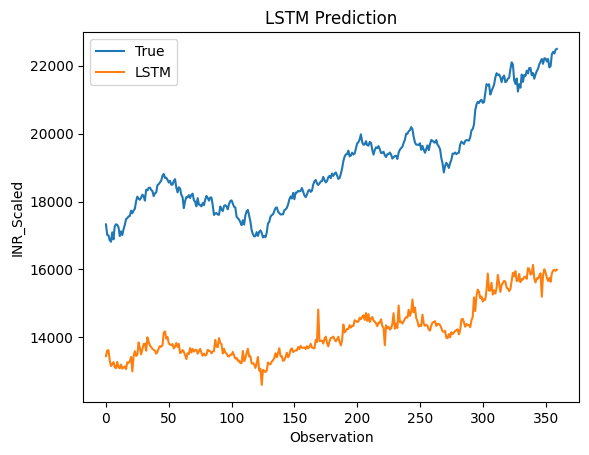

In [220]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# Mode Building : GRU

In [221]:
K.clear_session()
model_gru = Sequential()
model_gru.add(GRU(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
history_model_gru = model_gru.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
452/452 [==============================] - 3s 3ms/step - loss: 87477224.0000
Epoch 2/200
452/452 [==============================] - 1s 3ms/step - loss: 87118000.0000
Epoch 3/200
452/452 [==============================] - 1s 3ms/step - loss: 86563168.0000
Epoch 4/200
452/452 [==============================] - 1s 3ms/step - loss: 85845552.0000
Epoch 5/200
452/452 [==============================] - 1s 3ms/step - loss: 84983656.0000
Epoch 6/200
452/452 [==============================] - 2s 4ms/step - loss: 83992456.0000
Epoch 7/200
452/452 [==============================] - 2s 4ms/step - loss: 82884400.0000
Epoch 8/200
452/452 [==============================] - 1s 3ms/step - loss: 81670208.0000
Epoch 9/200
452/452 [==============================] - 1s 3ms/step - loss: 80358552.0000
Epoch 10/200
452/452 [==============================] - 1s 3ms/step - loss: 78957008.0000
Epoch 11/200
452/452 [==============================] - 1s 3ms/step - loss: 77472176.0000
Epoch 12/200
452/45

# Evaluation of GRU Model

In [223]:
y_pred_test_gru = model_gru.predict(X_tst_t)
print(f"GRU R2 score on Train set: {r2_score(y_train, model_gru.predict(X_tr_t)):.3f}")
print(f"GRU R2 score on Test set: {r2_score(y_test, y_pred_test_gru):.3f}")
score_gru = model_gru.evaluate(X_tst_t, y_test, batch_size=1)
print(f'GRU loss: {score_gru:.6f}')

113/113 [==============================] - 0s 3ms/step
GRU R2 score on Train set: 0.999
GRU R2 score on Test set: 0.928
360/360 [==============================] - 1s 3ms/step - loss: 155269.4219
GRU loss: 155269.421875


# Plotting Predictions made by GRU

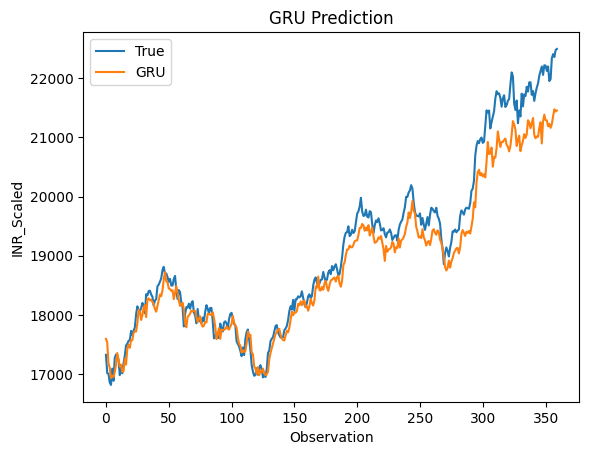

In [224]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_gru, label='GRU')
plt.title("GRU Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# Model Building : SimpleRNN

In [225]:
K.clear_session()
model_simplernn = Sequential()
model_simplernn.add(SimpleRNN(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_simplernn.add(Dense(1))
model_simplernn.compile(loss='mean_squared_error', optimizer='adam')
history_model_simplernn = model_simplernn.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
452/452 [==============================] - 2s 2ms/step - loss: 87458728.0000
Epoch 2/200
452/452 [==============================] - 2s 3ms/step - loss: 87088568.0000
Epoch 3/200
452/452 [==============================] - 2s 4ms/step - loss: 86533312.0000
Epoch 4/200
452/452 [==============================] - 1s 3ms/step - loss: 85806568.0000
Epoch 5/200
452/452 [==============================] - 1s 2ms/step - loss: 84924256.0000
Epoch 6/200
452/452 [==============================] - 1s 2ms/step - loss: 83903048.0000
Epoch 7/200
452/452 [==============================] - 1s 3ms/step - loss: 82757072.0000
Epoch 8/200
452/452 [==============================] - 1s 2ms/step - loss: 81497920.0000
Epoch 9/200
452/452 [==============================] - 1s 3ms/step - loss: 80135256.0000
Epoch 10/200
452/452 [==============================] - 1s 2ms/step - loss: 78677168.0000
Epoch 11/200
452/452 [==============================] - 1s 2ms/step - loss: 77130720.0000
Epoch 12/200
452/45

# Evaluation of SimpleRNN

In [226]:
y_pred_test_simplernn = model_simplernn.predict(X_tst_t)
print(f"SimpleRNN R2 score on Train set: {r2_score(y_train, model_simplernn.predict(X_tr_t)):.3f}")
print(f"SimpleRNN R2 score on Test set: {r2_score(y_test, y_pred_test_simplernn):.3f}")
score_simplernn = model_simplernn.evaluate(X_tst_t, y_test, batch_size=1)
print(f'SimpleRNN loss: {score_simplernn:.6f}')

113/113 [==============================] - 0s 1ms/step
SimpleRNN R2 score on Train set: 0.990
SimpleRNN R2 score on Test set: 0.555
360/360 [==============================] - 1s 2ms/step - loss: 964740.4375
SimpleRNN loss: 964740.437500


# Plotting Predictions made by SimpleRNN

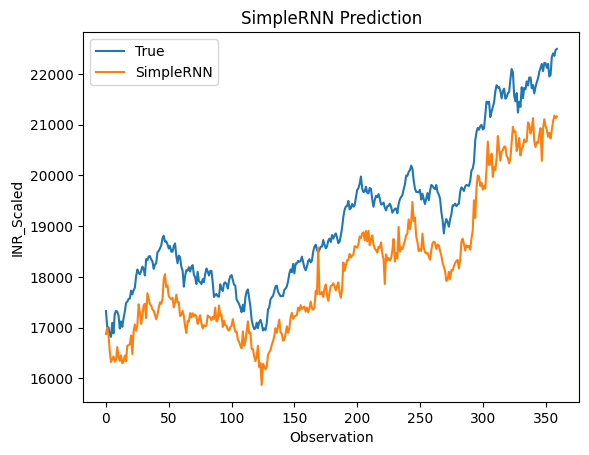

In [227]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_simplernn, label='SimpleRNN')
plt.title("SimpleRNN Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# Model building : CNN1D

In [228]:
seq_length = 5  # Example sequence length

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

# Create sequences for training and testing
X_tr_t_cnn = create_sequences(X_train, seq_length)
X_tst_t_cnn = create_sequences(X_test, seq_length)

# Adjust the target variable for the sequence length
y_train_cnn = y_train[seq_length:]
y_test_cnn = y_test[seq_length:]

In [229]:
X_tr_t_cnn.shape

(3604, 5, 4)

In [230]:
X_tst_t_cnn.shape

(355, 5, 4)

In [231]:
y_train_cnn.shape

(3604,)

In [232]:
K.clear_session()
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, X_train.shape[1])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))
model_cnn.compile(loss='mean_squared_error', optimizer='adam')
history_model_cnn = model_cnn.fit(X_tr_t_cnn, y_train_cnn, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
451/451 [==============================] - 1s 2ms/step - loss: 86359480.0000
Epoch 2/200
451/451 [==============================] - 1s 2ms/step - loss: 83208224.0000
Epoch 3/200
451/451 [==============================] - 1s 2ms/step - loss: 78697952.0000
Epoch 4/200
451/451 [==============================] - 1s 2ms/step - loss: 73001600.0000
Epoch 5/200
451/451 [==============================] - 1s 2ms/step - loss: 66437572.0000
Epoch 6/200
451/451 [==============================] - 1s 2ms/step - loss: 59316828.0000
Epoch 7/200
451/451 [==============================] - 1s 2ms/step - loss: 51919776.0000
Epoch 8/200
451/451 [==============================] - 1s 2ms/step - loss: 44493816.0000
Epoch 9/200
451/451 [==============================] - 1s 2ms/step - loss: 37256000.0000
Epoch 10/200
451/451 [==============================] - 1s 3ms/step - loss: 30395360.0000
Epoch 11/200
451/451 [==============================] - 1s 3ms/step - loss: 24073842.0000
Epoch 12/200
451/45

# Evaluation of CNN1D

In [233]:
y_pred_test_cnn = model_cnn.predict(X_tst_t_cnn)
print(f"CNN1D R2 score on Train set: {r2_score(y_train_cnn, model_cnn.predict(X_tr_t_cnn)):.3f}")
print(f"CNN1D R2 score on Test set: {r2_score(y_test_cnn, y_pred_test_cnn):.3f}")
score_cnn = model_cnn.evaluate(X_tst_t_cnn, y_test_cnn, batch_size=1)
print(f'CNN1D loss: {score_cnn:.6f}')

113/113 [==============================] - 0s 1ms/step
CNN1D R2 score on Train set: 0.997
CNN1D R2 score on Test set: 0.969
355/355 [==============================] - 1s 2ms/step - loss: 66661.7891
CNN1D loss: 66661.789062


# Plotting Predictions made by  CNN1D

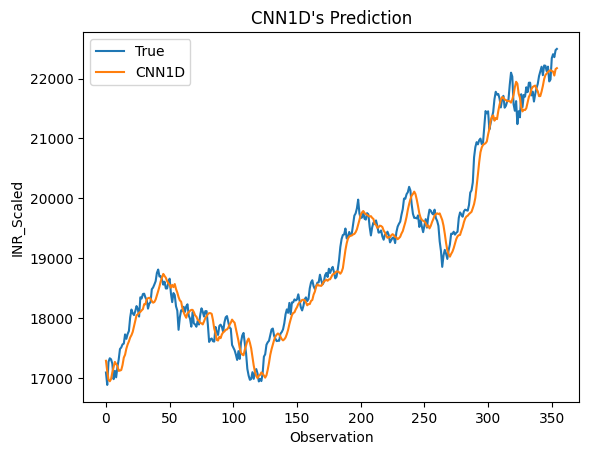

In [234]:
plt.plot(y_test_cnn, label='True')
plt.plot(y_pred_test_cnn, label='CNN1D')
plt.title("CNN1D's Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# Calculating All Models R2 Score ,RMSE and MASE

In [235]:
models = ['LSTM', 'GRU', 'SimpleRNN', 'CNN1D']
r2_scores = [
    r2_score(y_test, y_pred_test_lstm),
    r2_score(y_test, y_pred_test_gru),
    r2_score(y_test, y_pred_test_simplernn),
    r2_score(y_test_cnn, y_pred_test_cnn)
]

rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_test_lstm)),
    np.sqrt(mean_squared_error(y_test, y_pred_test_gru)),
    np.sqrt(mean_squared_error(y_test, y_pred_test_simplernn)),
    np.sqrt(mean_squared_error(y_test_cnn, y_pred_test_cnn))
]
def mase(y_true, y_pred):
    n = y_true.shape[0]
    d = np.abs(np.diff(y_true, axis=0)).sum() / (n-1)
    errors = np.abs(y_true - y_pred)
    return errors.mean() / d

mase_scores = [
    mase(y_test, y_pred_test_lstm),
    mase(y_test, y_pred_test_gru),
    mase(y_test, y_pred_test_simplernn),
    mase(y_test_cnn, y_pred_test_cnn)
]

comparison_df = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'RMSE': rmse_scores,
    'MASE': mase_scores
})

# Plotting Models R2 score Comparison

In [236]:
import matplotlib.pyplot as plt

# Define bar width and positions
bar_width = 0.25
index = np.arange(len(models))



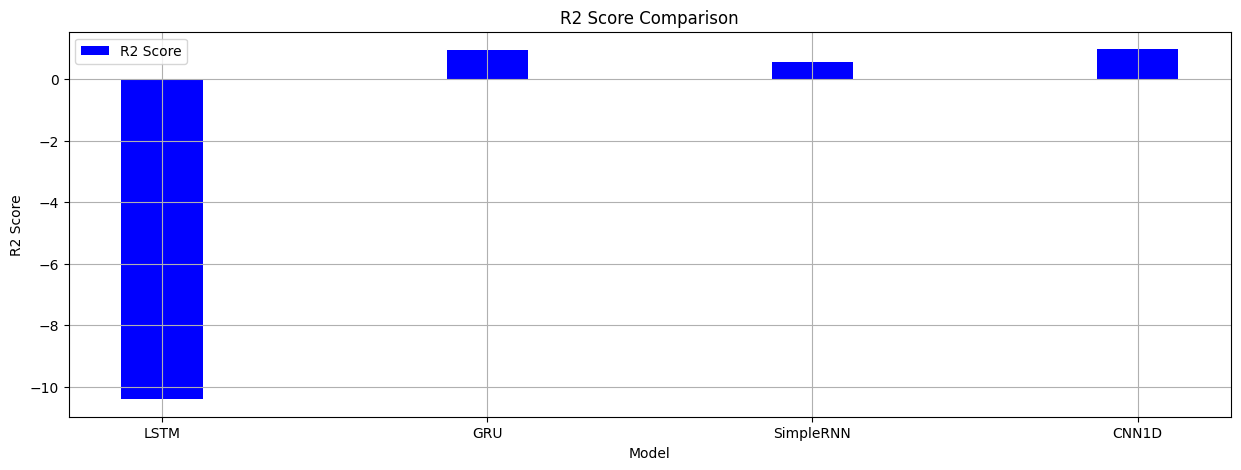

In [237]:
plt.figure(figsize=(15, 5))
plt.bar(index, r2_scores, bar_width, color='b', label='R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.xticks(index, models)
plt.legend()
plt.grid(True)
plt.show()


# Plotting Models RMSE Comparison

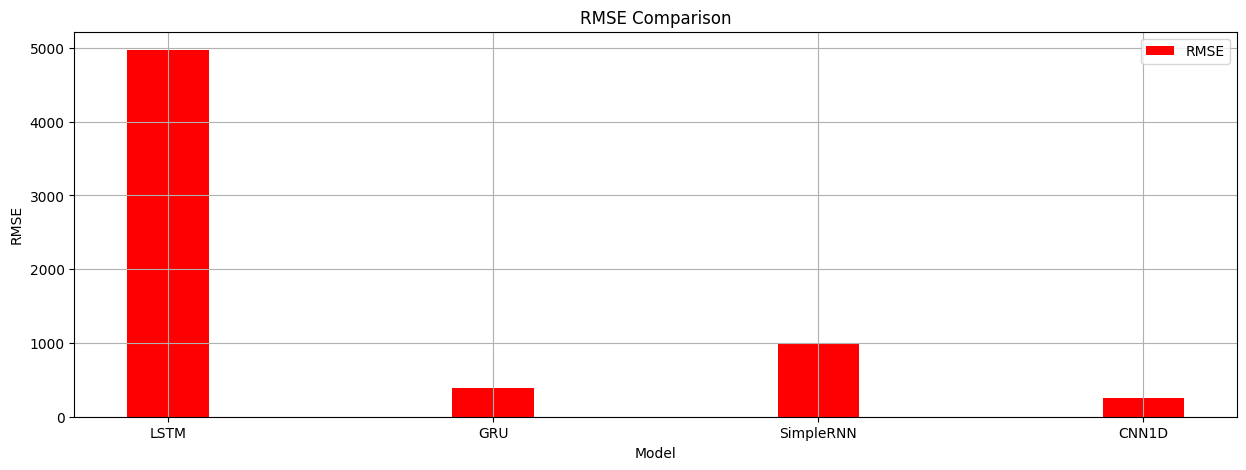

In [238]:
plt.figure(figsize=(15, 5))
plt.bar(index, rmse_scores, bar_width, color='r', label='RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.xticks(index, models)
plt.legend()
plt.grid(True)
plt.show()

# Plotting MASE Comparison

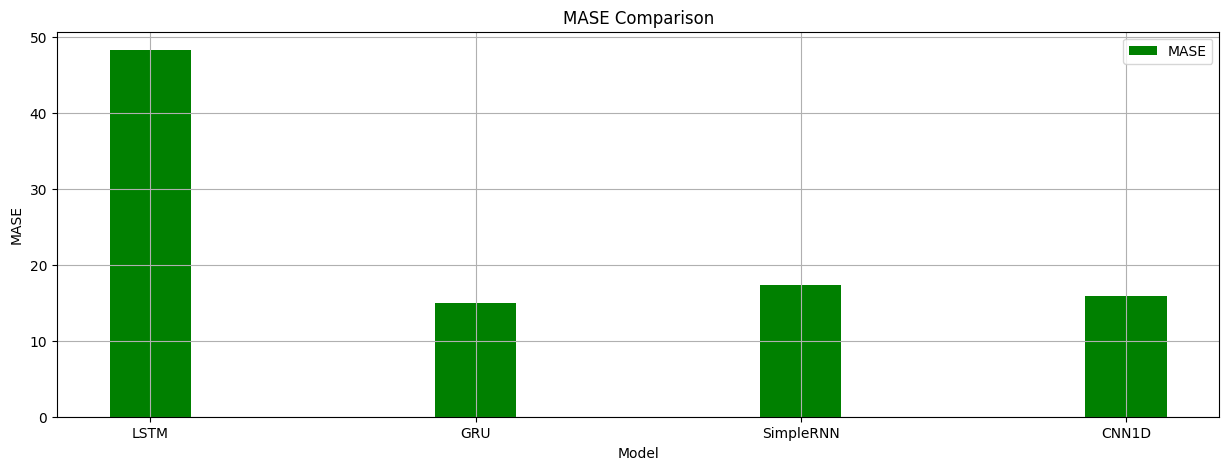

In [239]:
plt.figure(figsize=(15, 5))
plt.bar(index, mase_scores, bar_width, color='g', label='MASE')
plt.xlabel('Model')
plt.ylabel('MASE')
plt.title('MASE Comparison')
plt.xticks(index, models)
plt.legend()
plt.grid(True)
plt.show()

# Comparison Table


In [240]:
comparison_df

,Model,R2 Score,RMSE,MASE
0,LSTM,-10.401049,4971.008708,48.288711
1,GRU,0.928362,394.042390,15.029482
2,SimpleRNN,0.554891,982.212081,17.331233
3,CNN1D,0.968765,258.189479,15.941008


**Saving R2 score,RMSE and MASE of all Model in excel**

In [241]:
comparison_df.to_excel('ModelComparisonResults.xlsx', index=False)

# Plotting All Models Predictions

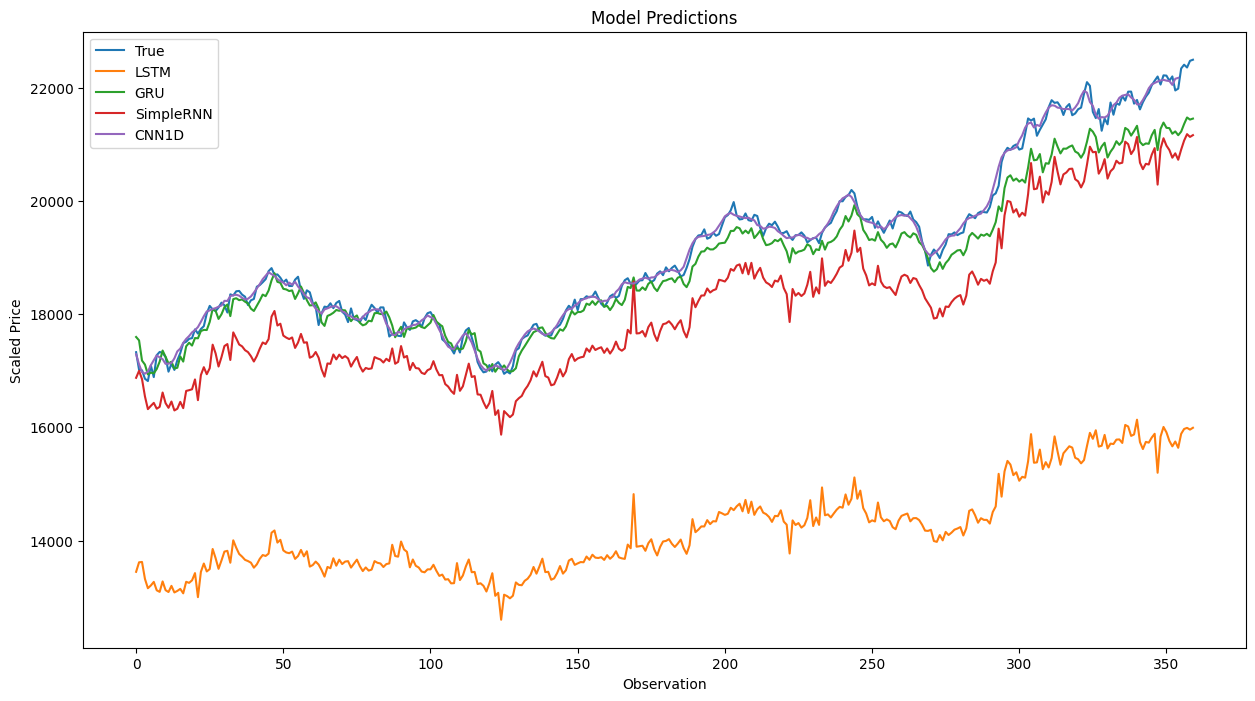

In [242]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.plot(y_pred_test_gru, label='GRU')
plt.plot(y_pred_test_simplernn, label='SimpleRNN')
plt.plot(y_pred_test_cnn, label='CNN1D')
plt.title("Model Predictions")
plt.xlabel('Observation')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

# Conclusion

It is impossible to  get a model that can 99% predict the price without any error, there are too many factors can affect the
stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.


Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure. As exact